In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**CLASSIFICATION PROBLEMS**

**Credit Classification**

**Reading and displaying few records of the data**

In [4]:
credit_df = pd.read_csv('German Credit Data.csv')
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [5]:
credit_df.iloc[0:5, 1:7]

,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,6,A34,1169,A65,A75,4
1,48,A32,5951,A61,A73,2
2,12,A34,2096,A61,A74,2
3,42,A32,7882,A61,A74,2
4,24,A33,4870,A61,A73,3


In [6]:
credit_df.iloc[0:5, 7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


In [7]:
credit_df.status.value_counts()

status
0    700
1    300
Name: count, dtype: int64

The Output displays that there are 700 observations of good credit and 300 observations of bad credit.

In [8]:
X_features = list(credit_df.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

**Encoding Categorical Features**

In [9]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first=True, dtype='int32')
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

For example, `checkin_acc` variable is encoded into the three dummy variables `checkin_acc_A12`, `checkin_acc_A13`, `checkin_acc_A14`. If all the 3 variables' values are set to 0, it indicates the account type is `checkin_acc_A11`

In [10]:
encoded_credit_df[['checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14']].head(5) 

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [11]:
Y = credit_df.status
X = sm.add_constant(encoded_credit_df)

**Splitting Dataset into Training and Test Sets**

We split the dataset into 70:30 ratio for creating training and validation datsets.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**Building Logistic Regression Model**

In [13]:
logit = sm.Logit(Y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


**Printing Model Summary**

In [14]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   status            Pseudo R-squared:  0.198     
Date:                 2025-06-04 22:17  AIC:               744.5132  
No. Observations:     700               BIC:               881.0456  
Df Model:             29                Log-Likelihood:    -342.26   
Df Residuals:         670               LL-Null:           -426.75   
Converged:            1.0000            LLR p-value:       1.0630e-21
No. Iterations:       6.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

**Model Diagnostics**

In [15]:
def get_significant_vars(lm):
    # Store the p-values and corresponding column names in a dataframe
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    # Filter the column names where p-values if less than 0.05
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])


significant_vars = get_significant_vars(logit_model)
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

Only the above features have come out to be significant variables. Now we can build a logistic regression using only the significant variables.z

In [16]:
final_logit = sm.Logit(Y_train, sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [17]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Method:           MLE       
Dependent Variable:  status           Pseudo R-squared: 0.161     
Date:                2025-06-04 22:17 AIC:              733.8898  
No. Observations:    700              BIC:              774.8495  
Df Model:            8                Log-Likelihood:   -357.94   
Df Residuals:        691              LL-Null:          -426.75   
Converged:           1.0000           LLR p-value:      7.4185e-26
No. Iterations:      6.0000           Scale:            1.0000    
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

The negative sign in coefficient value indicates that as the value of this variables increases, the probability of being a bad credit decreases. A positive sign means that the probability of being a bad credit increases as the corresponding value of the variable increases. Some observations from the model ouput are:
1. The log of odds ratio increases as `duration`, `amount`, `inst_rate` increases. For example, one unit change in duration results in 0.019723 unit change in log of odds ratio.
2. The probability of being a bad credit decreases as age increases. This means that older people tend to pay back their credits ontime compared to younger people.

**Predicting on Test Data**

In [18]:
Y_pred_df = pd.DataFrame({"actual": Y_test, "predicted_prob": final_logit.predict(sm.add_constant(X_test[significant_vars]))})
Y_pred_df.sample(10, random_state=42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


Let us assume that the Optimal Classification Cut-off be 0.5

In [19]:
Y_pred_df['predicted'] = Y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
Y_pred_df.sample(10, random_state=42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


It can be noticed from `actual` and `predicted` columns that some classifications are correct and some are wrong. For better understanding of this confusion, we can build a confusion matrix.

**Creating a Confusion Matrix**

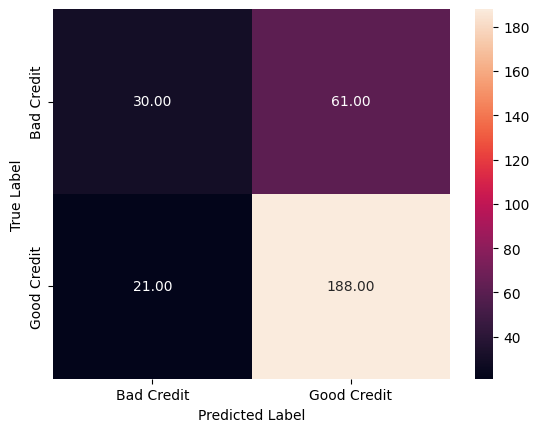

In [20]:
from sklearn import metrics
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, labels=[1, 0])
    sn.heatmap(cm, annot=True, fmt='.2f', xticklabels=["Bad Credit", "Good Credit"], yticklabels=["Bad Credit", "Good Credit"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


draw_cm(Y_pred_df.actual, Y_pred_df.predicted)

Here :
1. Left-top quadrant represents actual bad credit and is correctly classified as bad credit. This is called True Positives(TP).
2. Left-down quadrant represents actualy good credit and is incorrectly classificed as bad credit. This is called False Positives(FP).
3. Right-top quadrant represents actual bad credit and is incorrectly classified as good credit. This is called False Negatives(FN).
4. Right-down quadrant represents actual good credit and is correclt classifed as good credit. This is called True Negatives(TN)

**Measuring Accuracies**

In [21]:
print(metrics.classification_report(Y_pred_df.actual, Y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



The model is very good at identifying the good credits(Y = 0), but not very good at identifying bad credits. This is the result for cut-off probability of 0.5%. This can be improved by choosing the right cut-off probability.

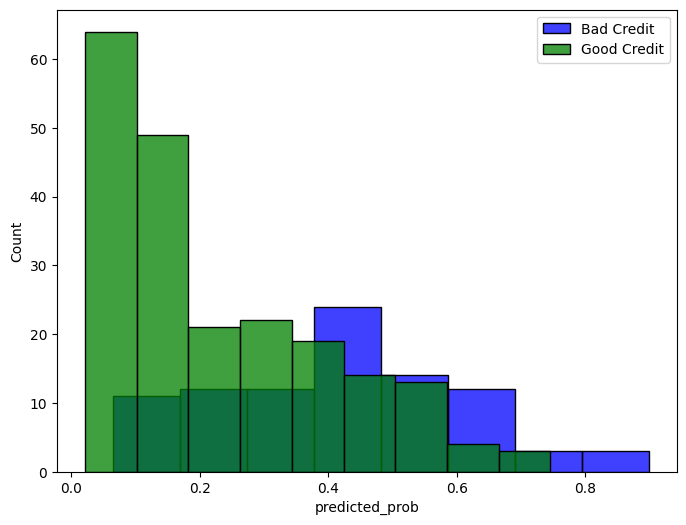

In [22]:
plt.figure(figsize=(8, 6))
# Plotting distribution of predicted probability values for bad credits
sn.histplot(Y_pred_df[Y_pred_df.actual == 1]["predicted_prob"], kde=False, color='b', label='Bad Credit')
# Plotting distribution of predicted probability values for good credits
sn.histplot(Y_pred_df[Y_pred_df.actual == 0]["predicted_prob"], kde=False, color='g', label='Good Credit')
plt.legend()
plt.show()

Larger the overlap between predicted probabilites for different classes, higher will be the misclassifications.

**Receiver Operating Characteristic(ROC) and Area Under the Curve(AUC)**

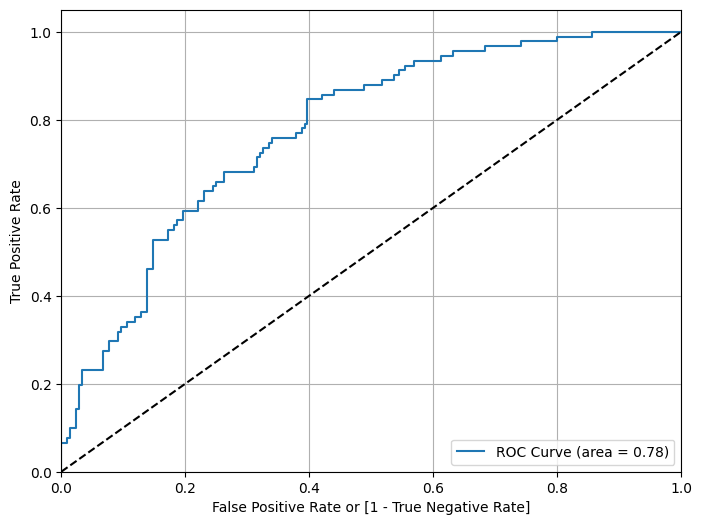

In [23]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 6))
   
    # Plot the fpr and tpr values for different threshold values
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
    
    # Draw a diagonal line connecting the origin and top right most point
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Setting x and y labels
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return fpr, tpr, thresholds


fpr, tpr, thresholds = draw_roc(Y_pred_df.actual, Y_pred_df.predicted_prob)

As a thumb rule, AUC of at least 0.7 is required for practical application of the model. AUC greater than 0.9 implies an outstanding model. Cuation should be exercises while selecting models based on AUC, especially when the data is imbalanced(i.e., dataset which has less than 10% positives). In case of imbalanced datasets, the AUC may be very high(greater than 0.9); however, either sensitivity or specificity values may be poor.

For this example, the AUC is 0.78, which implies the model is fairly good.

**Finding Optimal Classificaiton Cut-off**

1. Youden's Index

In [24]:
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds})

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values('diff', ascending=False)[0:5]

,tpr,fpr,thresholds,diff
160,0.846154,0.397129,0.221534,0.449025
161,0.846154,0.401914,0.216531,0.444240
162,0.846154,0.406699,0.215591,0.439455
159,0.835165,0.397129,0.223980,0.438036
166,0.857143,0.421053,0.207107,0.436090


From the above result, the optimal cut-off is 0.22.

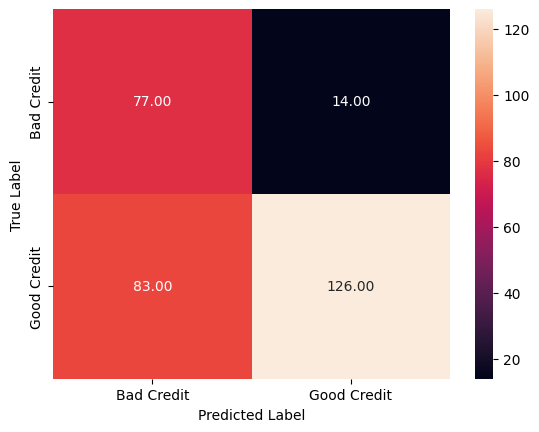

In [25]:
Y_pred_df['predicted_new'] = Y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.22 else 0)

draw_cm(Y_pred_df.actual, Y_pred_df.predicted_new)

In [26]:
print(metrics.classification_report(Y_pred_df.actual, Y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

    accuracy                           0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300



2. Cost-Based Approach
    

In [27]:
def get_total_cost(actual, predicted, cost_FP, cost_FN):
    # Correct way to pass the labels argument
    cm = metrics.confusion_matrix(actual, predicted, labels=[1, 0])
    cm_mat = np.array(cm)
    
    # False positives = cm[1, 0], False negatives = cm[0, 1]
    return cm_mat[0, 1] * cost_FN + cm_mat[1, 0] * cost_FP

Let us assume that false negatives(predicting a bad credit to be a good credit) are 5 times costlier than flase positives(predicting a good credit to be a bad credit). Deciding the costs will require domain knowledge.

In [28]:
cost_df = pd.DataFrame(columns = ['prob', 'cost'])
idx = 0

# Iterate cut-off probability values between 0.10 and 0.49
for each_prob in range(10, 50):
    # Calculate the cost for the current threshold
    cost = get_total_cost(
        Y_pred_df.actual, 
        Y_pred_df.predicted_prob.map(lambda x: 1 if x > (each_prob / 100) else 0),
        1, 5
    )
    
    # Append the result
    cost_df.loc[idx] = [(each_prob / 100), cost]
    idx += 1

# Sort by cost and show top 5 thresholds
cost_df.sort_values('cost').head()

,prob,cost
4,0.14,150.0
12,0.22,153.0
10,0.20,154.0
2,0.12,154.0
5,0.15,156.0


The lowest cost is achieved at cut-off proability of 0.14 if false negatives are assumed to be five times costlier than false positives. So, let us predict everything beyond 0.14 as bad credit and below 0.14 as good credit.

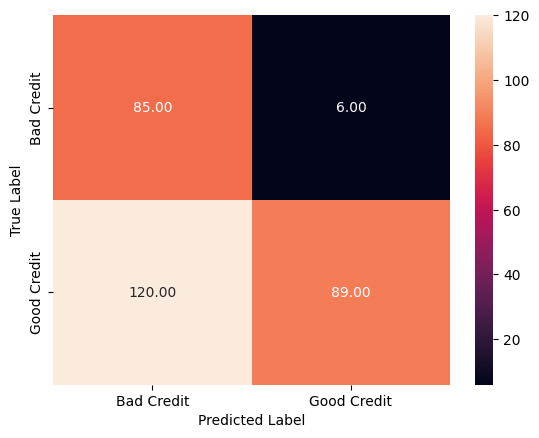

In [29]:
Y_pred_df['predicted_using_cost'] = Y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.14 else 0)

draw_cm(Y_pred_df.actual, Y_pred_df.predicted_using_cost)

**CLASSIFICATION TREE (DECISION TREE LEARNING)**

**Splitting the Dataset**

Set `encoded_credit_df` as X and the column `status` as Y and split the data into train and test sets using 70:30 splitting criteria

In [30]:
Y = credit_df.status
X = encoded_credit_df

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**Building Decision Tree Classifier using Gini Criteria**

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

**Measuring Test Accuracy**

In [33]:
tree_predict = clf_tree.predict(X_test)
metrics.roc_auc_score(y_test, tree_predict)

np.float64(0.5713497029286503)

**Displaying the Tree**

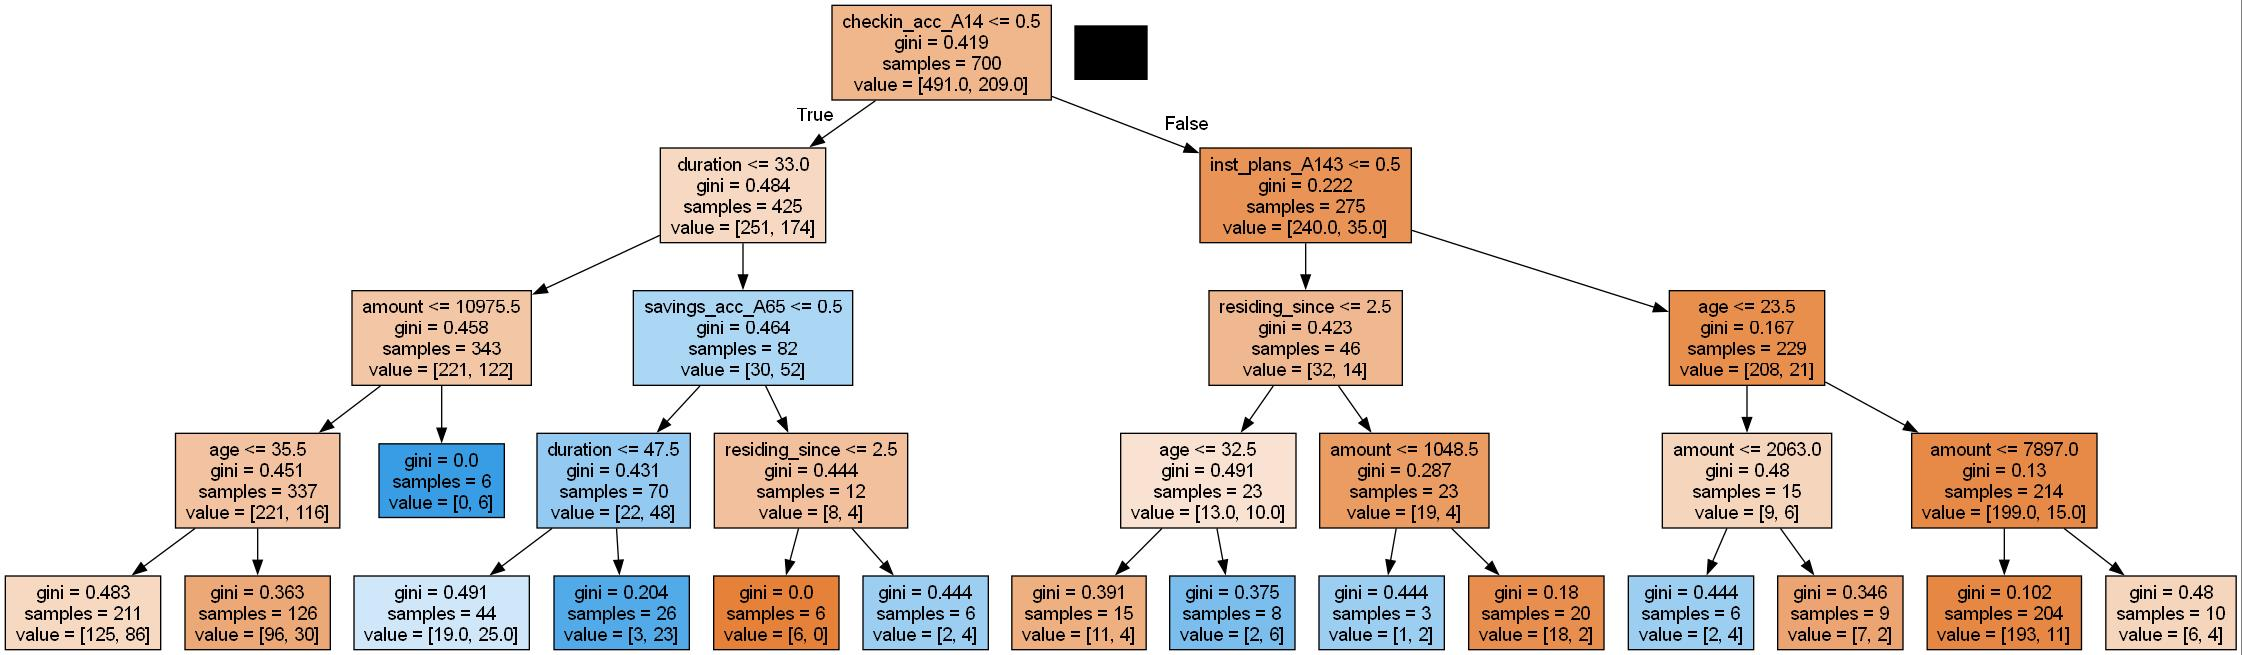

In [34]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export the tree into odt file
export_graphviz(clf_tree, out_file="chd_tree.odt", feature_names=X_train.columns, filled=True)

# Read and create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree.odt')
chd_tree_graph.write_jpg('chd_tree.png')

# Render the png file
Image(filename='chd_tree.png')

In [35]:
gini_node_1 = 1 - pow(491/700, 2) - pow(209/700, 2)
print(round(gini_node_1, 4))

0.4189


**Building Decision Tree using Entropy Criteria**

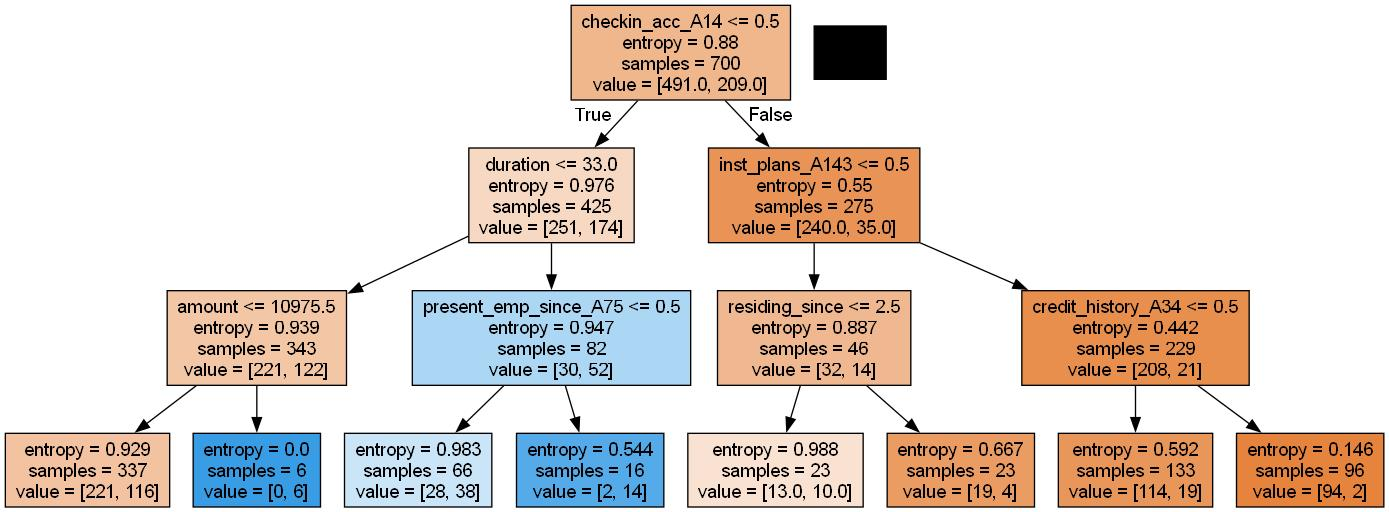

In [36]:
clf_tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_tree_entropy.fit(X_train, y_train)

# Export the tree into odt file
export_graphviz(clf_tree_entropy, out_file="chd_tree_entropy.odt", feature_names=X_train.columns, filled=True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree_entropy.odt')
chd_tree_graph.write_jpg('chd_tree_entropy.png')

# Render the png file
Image(filename='chd_tree_entropy.png')

Calculating Entropy :-

In [37]:
import math
entropy_node_1 = -(491/700) * math.log2(491/700) - (209/700) * math.log2(209/700)
print(round(entropy_node_1, 2))

0.88


Measuring Test Accuracy using AUC

In [38]:
tree_predict = clf_tree_entropy.predict(X_test)
metrics.roc_auc_score(y_test, tree_predict)

np.float64(0.5763972869236027)

**Finding Optimal Criteria and Max Depth**

In [39]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 10)}]

clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree, tuned_parameters, cv=10, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [40]:
clf.best_score_

np.float64(0.6833090864917397)

In [41]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}